In [13]:
import pandas as pd
import bz2

def compress_xml_bz2(input_filepath, output_filepath): #Already compressed, just showing the function I used
    with open(input_filepath, 'rb') as f_in, bz2.open(output_filepath, 'wb') as f_out:
        f_out.writelines(f_in)




data = pd.read_xml("export.xml.bz2")

#This is data from my Apple Health. I am going to explore my activeEnergy per day.

File compressed to: export.xml.bz2


In [14]:
df = pd.DataFrame(data) 
print(df.columns)



Index(['value', 'HKCharacteristicTypeIdentifierDateOfBirth',
       'HKCharacteristicTypeIdentifierBiologicalSex',
       'HKCharacteristicTypeIdentifierBloodType',
       'HKCharacteristicTypeIdentifierFitzpatrickSkinType',
       'HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse', 'type',
       'sourceName', 'sourceVersion', 'unit', 'creationDate', 'startDate',
       'endDate', 'device', 'MetadataEntry', 'Record', 'workoutActivityType',
       'duration', 'durationUnit', 'WorkoutStatistics', 'dateComponents',
       'activeEnergyBurned', 'activeEnergyBurnedGoal',
       'activeEnergyBurnedUnit', 'appleMoveTime', 'appleMoveTimeGoal',
       'appleExerciseTime', 'appleExerciseTimeGoal', 'appleStandHours',
       'appleStandHoursGoal'],
      dtype='object')


In [15]:
df = df.dropna(subset=['activeEnergyBurned'])  # Drop the rows where activeEnergyBurned is empty

for column in df.columns:
    has_non_empty_col = df[column].notna().any()  # Check for columns with non-empty values
    if has_non_empty_col:
        print(column)


df_activeEnergyBurned = df[['activeEnergyBurned', 'appleExerciseTime']] # Select only the columns activeEnergyBurned and appleExerciseTime


print(df_activeEnergyBurned)

dateComponents
activeEnergyBurned
activeEnergyBurnedGoal
activeEnergyBurnedUnit
appleMoveTime
appleMoveTimeGoal
appleExerciseTime
appleExerciseTimeGoal
appleStandHours
appleStandHoursGoal
        activeEnergyBurned  appleExerciseTime
934484               0.000                0.0
934485               0.000                0.0
934486               0.000                0.0
934487             830.713              180.0
934488             169.102               12.0
...                    ...                ...
935428             261.924                0.0
935429             259.947                0.0
935430              95.229                0.0
935431             283.682                0.0
935432             109.026                0.0

[949 rows x 2 columns]


In [16]:
import numpy as np # Showing some statistics using numpy

print(df_activeEnergyBurned.describe())


# Doing it manually
mean_energy = df_activeEnergyBurned['activeEnergyBurned'].mean()
num_days = len(df_activeEnergyBurned)
sum_energy = np.sum(df['activeEnergyBurned'])
max_energy = np.max(df['activeEnergyBurned'])

print("Num days =", num_days)
print("Mean energy =", mean_energy)
print("Sum energy", sum_energy)
print("Max energy =",max_energy)

       activeEnergyBurned  appleExerciseTime
count          949.000000         949.000000
mean           209.805523           3.445732
std            198.279976          16.232828
min              0.000000           0.000000
25%             67.069000           0.000000
50%            155.384000           0.000000
75%            292.323000           0.000000
max           1421.070000         180.000000
Num days = 949
Mean energy = 209.80552301369866
Sum energy 199105.44134000002
Max energy = 1421.07


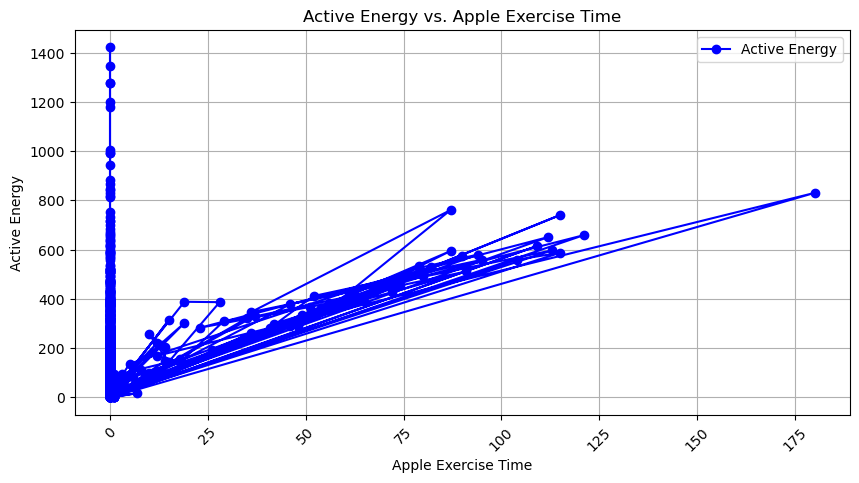

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.plot(df_activeEnergyBurned['appleExerciseTime'], df_activeEnergyBurned['activeEnergyBurned'], marker='o', linestyle='-', color='b', label="Active Energy")
plt.xlabel('Apple Exercise Time')
plt.ylabel('Active Energy')
plt.title('Active Energy vs. Apple Exercise Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Doesn't really show much, but it's something
plt.show()